In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.85870395, -1.65233341],
       [-0.40569776, -0.37041474],
       [ 2.2024507 , -0.23528973],
       ...,
       [ 0.99988464, -0.55916363],
       [-1.76009455,  0.91772758],
       [-0.74192939, -1.24760068]])

In [5]:
y

array([ -40.99645415,  -12.12998894,   22.71867309,  -35.11554495,
         14.41348344,   32.48536581,  -16.56559943,   12.14179051,
         46.08860833,  -14.8752242 ,  -21.31494271,   -2.66613222,
         18.43268511,   -8.02255587,   14.56796078,  -25.95367493,
          8.10092276,   23.17831045,   69.1617891 ,  -25.92742536,
         33.87189306,    4.76268117,    2.30365961,   28.53943275,
         -4.45589754,  -18.38357422,  -35.40330128,   40.42417378,
        -34.44029517,   44.20571792,  -16.33928732,   13.95664434,
        -14.76787257,   23.31301378,  -64.18459699,   -2.0048605 ,
         67.89600014,    8.81192068,   19.52177842,  -25.38918279,
        -51.31468088,   14.53526511,   36.86665516,  -21.78312051,
         55.47951585,   73.205044  ,   55.92019935,   46.80266363,
         16.55288829,    0.92491218,  -46.21807345,    3.83139501,
        -26.70432667,   85.23306551,   26.54356883,   -0.22896484,
        -65.19057141,  -33.97962051,    3.76250715,   -0.46274

In [6]:
pd.DataFrame(X)[0]

0      0.858704
1     -0.405698
2      2.202451
3     -0.781222
4     -0.218288
         ...   
995    0.267834
996    1.358186
997    0.999885
998   -1.760095
999   -0.741929
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

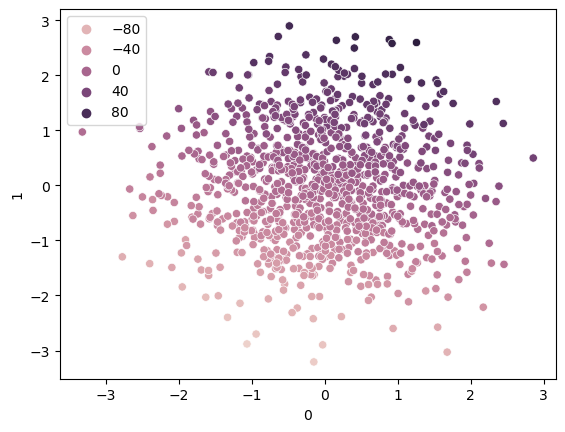

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[11.11777043, 32.72421117]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([-8.04331670e+00, -3.60028070e+01, -2.80606238e+01, -8.05801979e+01,
       -3.74954539e+01,  5.04757626e+00, -1.32225568e+01,  3.37932578e+01,
       -6.95168839e-01, -2.77152369e+01,  4.72774703e+01, -8.41238632e+00,
        6.76765532e+00, -8.07110062e+01,  5.36178800e+00,  3.85354270e+01,
       -1.78866474e+01,  7.21612722e+01,  3.88371092e+01,  4.51542613e+01,
       -2.42161215e+01,  3.13807516e+01, -5.94458898e+01, -2.32455657e+01,
        9.48512258e+00,  2.72185608e+00,  1.56284589e+01, -1.30390932e+01,
       -1.51309406e+01,  1.23576260e+01,  1.23424605e+01, -2.18970873e+01,
       -4.34635999e+00,  1.03817484e+01,  1.32679715e+01, -4.25013840e+01,
        5.24100072e+00,  3.22700057e+01, -3.39708960e+01, -8.92626503e+00,
       -3.56159606e+01, -2.16537327e+01,  1.91293488e+01, -2.37363287e+01,
       -6.20654911e+01, -1.85871595e+01, -2.79979544e-01,  1.10761187e+01,
        4.11514156e+01, -6.84004689e+01,  4.61668745e+01, -1.40220522e+01,
       -3.96005291e+01,  

In [16]:
from sklearn .metrics import r2_score
print(r2_score(y_test,y_pred))

0.9922890840723001


# Hyperparameter Tunining with SVR

In [21]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
    
}

In [22]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.992 total time=   0.0

[CV 2/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.992 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.992 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[

[CV 2/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.2s
[CV 3/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.2s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.993 total time=   0.2s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.992 total time=   0.3s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.992 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.990 total time=   0.2s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.993 total time=   0.2s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.992 total time=   0.2s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.992 total time=   0.

[CV 1/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.992 total time=   1.7s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.992 total time=   2.0s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.990 total time=   1.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.993 total time=   2.2s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.992 total time=   1.9s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.992 total time=   1.8s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.992 total time=   2.0s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.990 total time=   1.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.993 total time=   2.2s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.992 total time=   1.8s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, s

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [24]:
# prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9922602856766588
